# Anomaly Detection – Theory

---

## 1. Definition
Anomaly Detection (also called **Outlier Detection**) is the process of identifying data points that **deviate significantly** from the majority of the data.  
- These unusual points are called **anomalies** or **outliers**.  
- Commonly used in **fraud detection, network security, fault detection, and monitoring systems**.

---

## 2. Key Concepts
- **Normal points**: Data points that follow the expected behavior or pattern.  
- **Anomalies**: Points that **do not conform** to normal patterns.  
- Can be **point anomalies, contextual anomalies, or collective anomalies**.

---

## 3. Methods
### 3.1 Statistical Methods
- Assume data follows a distribution (e.g., Gaussian).  
- Points beyond a certain threshold (e.g., 3 standard deviations) are anomalies.

### 3.2 Proximity-Based Methods
- **Distance-based**: Points far from neighbors are anomalies (e.g., KNN-based).  
- **Density-based**: Low-density regions indicate anomalies (e.g., Local Outlier Factor - LOF).

### 3.3 Machine Learning Methods
- **Isolation Forest**: Randomly splits data; anomalies are easier to isolate.  
- **One-Class SVM**: Learns the boundary around normal data; points outside are anomalies.

---

## 4. Applications
- Fraud detection (banking, credit cards)  
- Network intrusion detection  
- Industrial fault detection  
- Health monitoring (abnormal vital signs)

---

## 5. Advantages
- Helps identify **rare but important events**.  
- Improves **data quality** by detecting noise or errors.  

---

## 6. Limitations
- Anomalies may be **context-specific**.  
- Sensitive to **hyperparameters** in ML-based methods.  
- Difficult in **high-dimensional datasets**.

---

## 7. Implementation in Python
- Libraries: `scikit-learn` provides `IsolationForest`, `OneClassSVM`, `LocalOutlierFactor`.  
- Steps:
  1. Load dataset  
  2. Standardize features  
  3. Train anomaly detection model  
  4. Predict anomalies/outliers  
  5. Visualize results


[[ 0.14901425 -0.04147929]
 [ 0.19430656  0.45690896]
 [-0.07024601 -0.07024109]
 [ 0.47376384  0.23023042]
 [-0.14084232  0.16276801]
 [-0.13902531 -0.13971893]
 [ 0.07258868 -0.57398407]
 [-0.51747535 -0.16868626]
 [-0.30384934  0.0942742 ]
 [-0.27240722 -0.42369111]
 [ 0.43969463 -0.06773289]
 [ 0.02025846 -0.42742446]
 [-0.16331482  0.03327678]
 [-0.34529807  0.11270941]
 [-0.18019161 -0.08750812]
 [-0.18051198  0.55568346]
 [-0.00404917 -0.31731328]
 [ 0.24676347 -0.36625309]
 [ 0.06265908 -0.58790104]
 [-0.39845581  0.05905837]
 [ 0.22153997  0.05141048]
 [-0.03469448 -0.09033111]
 [-0.4435566  -0.21595326]
 [-0.13819163  0.31713667]
 [ 0.10308549 -0.52891205]
 [ 0.09722519 -0.11552468]
 [-0.2030766   0.18350289]
 [ 0.30929986  0.27938404]
 [-0.25176526 -0.09276371]
 [ 0.09937903  0.29266354]
 [-0.14375227 -0.05569769]
 [-0.33190049 -0.35886199]
 [ 0.24375775  0.40687201]
 [-0.02160304  0.30105987]
 [ 0.10849081 -0.19353593]
 [ 0.10841868  0.46141097]
 [-0.01074781  0.4693931 ]
 

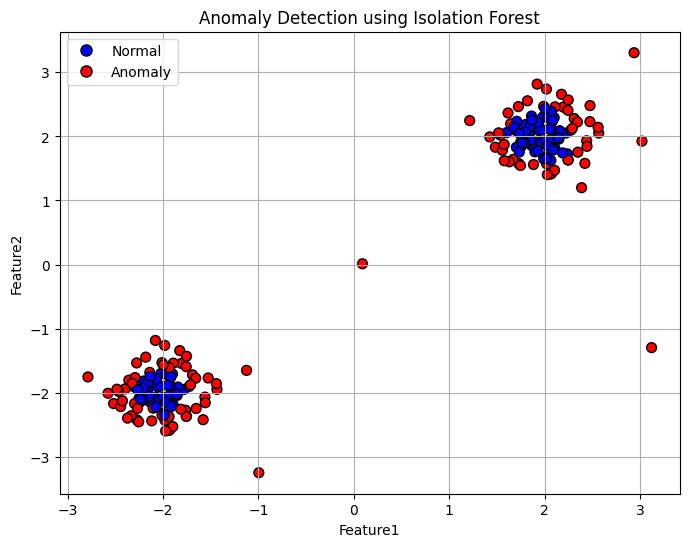


Anomalous points detected:

     Feature1  Feature2  anomaly
1    2.194307  2.456909       -1
3    2.473764  2.230230       -1
6    2.072589  1.426016       -1
7    1.482525  1.831314       -1
9    1.727593  1.576309       -1
..        ...       ...      ...
205  0.090739  0.012130       -1
206  2.386361  1.199711       -1
207  1.615735  2.366341       -1
208  3.120043 -1.296039       -1
209 -0.995336 -3.248144       -1

[105 rows x 3 columns]


In [1]:
# ==============================
# Anomaly Detection – Isolation Forest
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. Create a synthetic dataset
np.random.seed(42)

# Normal data
X_normal = 0.3 * np.random.randn(100, 2)
print(X_normal)

# Add some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
print(X_outliers)

# Combine into one dataset
X = np.r_[X_normal + 2, X_normal - 2, X_outliers]  # shape: (210, 2)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 3. Train Isolation Forest
iso_forest = IsolationForest(contamination=0.5, random_state=42)
iso_forest.fit(X_scaled)

# 4. Predict anomalies
# -1 for anomaly, 1 for normal
data['anomaly'] = iso_forest.predict(X_scaled)

# 5. Visualize results
plt.figure(figsize=(8,6))
plt.scatter(data['Feature1'], data['Feature2'],
            c=data['anomaly'].map({1: 'blue', -1: 'red'}),
            s=50, edgecolor='k', label='Points')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=8, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w', label='Anomaly', markerfacecolor='red', markersize=8, markeredgecolor='k')
])
plt.grid(True)
plt.show()

# 6. Print anomalies
print("\nAnomalous points detected:\n")
print(data[data['anomaly'] == -1])


## Anomaly Detection Using Kaggle Dataset

In [5]:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username": "kartikrajeshpatel", "key": "KGAT_033ecba91ef3d136476a830275e069b0"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sujithmandala/simple-rainfall-classification-dataset
!unzip simple-rainfall-classification-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/sujithmandala/simple-rainfall-classification-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/804 [00:00<?, ?B/s]
100% 804/804 [00:00<00:00, 2.97MB/s]
Archive:  simple-rainfall-classification-dataset.zip
  inflating: rainfall.csv            


In [7]:
import os
import pandas as pd

# Step 1: Find CSV files safely
csv_files = [f for f in os.listdir() if f.lower().endswith('.csv')]

if not csv_files:
    raise FileNotFoundError("❌ No CSV files found in the current directory.")

print("✅ Found CSV files:", csv_files)

# If multiple CSV files exist, pick the first one (or change index manually)
selected_file = csv_files[0]
print(f"\n📂 Reading file: {selected_file}")

try:
    df = pd.read_csv(selected_file)
except Exception as e:
    raise RuntimeError(f"❌ Error reading the file: {e}")

# Step 2: Check if DataFrame is empty
if df.empty:
    raise ValueError("❌ The CSV file is empty.")

print("\n🔹 Preview")
display(df.head())

print("\n🔹 Info")
df.info()

print("\n🔹 Statistical Summary")
display(df.describe(include='all'))  # includes categorical columns

print("\n🔹 Missing Values")
print(df.isnull().sum())


✅ Found CSV files: ['rainfall.csv']

📂 Reading file: rainfall.csv

🔹 Preview


,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy



🔹 Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB

🔹 Statistical Summary


,date,rainfall,temperature,humidity,wind_speed,weather_condition
count,54,53.000000,53.000000,53.000000,53.000000,53
unique,54,NaN,NaN,NaN,NaN,2
top,2022-01-01,NaN,NaN,NaN,NaN,Rainy
freq,1,NaN,NaN,NaN,NaN,42
mean,NaN,9.049057,17.950943,69.245283,6.403774,NaN
std,NaN,6.712521,2.500663,11.969361,2.209069,NaN
min,NaN,0.000000,13.900000,44.000000,2.100000,NaN
25%,NaN,3.900000,16.100000,62.000000,4.700000,NaN
50%,NaN,8.300000,17.800000,72.000000,6.700000,NaN
75%,NaN,14.800000,19.400000,78.000000,8.300000,NaN



🔹 Missing Values
date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

# Use only numeric columns (best practice for anomaly detection)
features = df.select_dtypes(include='number')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [9]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.05,   # 5% anomalies (realistic)
    random_state=42
)

df['anomaly'] = iso.fit_predict(X_scaled)


In [10]:
print(df['anomaly'].value_counts())

print("\n🔹 Detected Anomalous Rows")
display(df[df['anomaly'] == -1])


anomaly
 1    51
-1     3
Name: count, dtype: int64

🔹 Detected Anomalous Rows


,date,rainfall,temperature,humidity,wind_speed,weather_condition,anomaly
12,2022-01-13,0.0,22.4,45.0,2.1,Sunny,-1
41,2022-02-11,0.0,23.4,44.0,3.1,Sunny,-1
48,2022-02-18,11.9,14.1,89.0,10.5,Rainy,-1


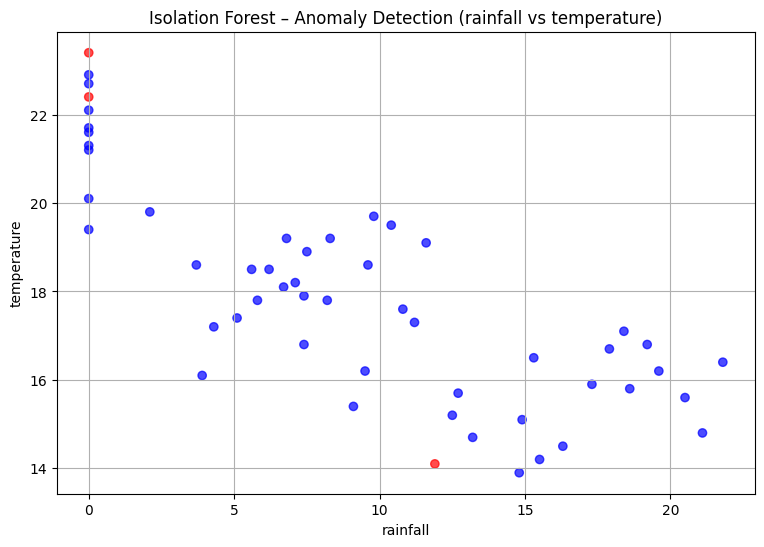

In [11]:
import matplotlib.pyplot as plt

# Automatically pick two numeric columns for plotting
num_cols = df.select_dtypes(include='number').columns.tolist()

if len(num_cols) < 2:
    raise ValueError("Need at least two numeric columns to plot")

x_col, y_col = num_cols[0], num_cols[1]

plt.figure(figsize=(9,6))
plt.scatter(
    df[x_col],
    df[y_col],
    c=df['anomaly'].map({1: 'blue', -1: 'red'}),
    alpha=0.7
)

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Isolation Forest – Anomaly Detection ({x_col} vs {y_col})")
plt.grid(True)
plt.show()
